# TASK2 - Stock Market Prediction And Forecasting Using Stacked LSTM

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\HP\Desktop\LGM\NSE-TATAGLOBAL.csv')
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


Text(0, 0.5, 'Close')

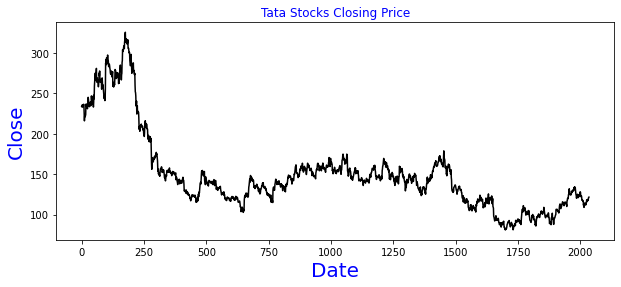

In [5]:
plt.figure(figsize = (10,4))
plt.title('Tata Stocks Closing Price', color='Blue')
plt.plot(data['Close'], color='Black')
plt.xlabel('Date',fontsize=20, color='Blue')
plt.ylabel('Close',fontsize=20, color='Blue')

In [6]:
data_close = data.reset_index()['Close']
data_close.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [7]:
from sklearn.preprocessing import MinMaxScaler 
import math 
import seaborn as sb 
from sklearn.metrics import mean_squared_error

In [8]:
scaler = MinMaxScaler(feature_range = (0, 1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# Training data 85 % and Testing data 15%

In [9]:

train_size = int(len(data_close) * 0.85)
test_size = len(data_close) - train_size
train_data, test_data = data_close[0 : train_size, :], data_close[train_size : len(data_close), : 1]
train_size, test_size

(1729, 306)

In [10]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.02920752],
       [0.02328431],
       [0.01919935]])

# The above data is related to time series Dataset's

In [11]:
def create_dataset(dataset, time_step = 1):
    X_data, Y_data = [], []
    for i in range(len(dataset) - time_step - 1):
	    a = dataset[i : (i + time_step), 0] 
	    X_data.append(a)
	    Y_data.append(dataset[i + time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [12]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1628, 100) (1628,)
(205, 100) (205,)


In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [15]:
!pip install keras
!pip install tensorflow
from keras.models import Sequential 
from keras.layers import Dense, LSTM 

# Now tarting LSTM Model


In [16]:
lst = Sequential()
lst.add(LSTM(50,return_sequences = True, input_shape = (100, 1)))
lst.add(LSTM(50, return_sequences = True))
lst.add(LSTM(50))
lst.add(Dense(1))
lst.compile(loss = 'mean_squared_error', optimizer='adam')

In [17]:
lst.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
lst.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
26/26 [==============================] - 18s 327ms/step - loss: 0.0223 - val_loss: 0.0063
Epoch 2/100
26/26 [==============================] - 6s 226ms/step - loss: 0.0027 - val_loss: 5.8127e-04
Epoch 3/100
26/26 [==============================] - 6s 212ms/step - loss: 0.0016 - val_loss: 5.5578e-04
Epoch 4/100
26/26 [==============================] - 6s 217ms/step - loss: 0.0015 - val_loss: 4.8417e-04
Epoch 5/100
26/26 [==============================] - 6s 221ms/step - loss: 0.0014 - val_loss: 4.7291e-04
Epoch 6/100
26/26 [==============================] - 6s 220ms/step - loss: 0.0013 - val_loss: 4.4108e-04
Epoch 7/100
26/26 [==============================] - 6s 226ms/step - loss: 0.0013 - val_loss: 4.4877e-04
Epoch 8/100
26/26 [==============================] - 6s 224ms/step - loss: 0.0012 - val_loss: 4.8960e-04
Epoch 9/100
26/26 [==============================] - 6s 221ms/step - loss: 0.0012 - val_loss: 4.0158e-04
Epoch 10/100
26/26 [==============================] - 6s 2

26/26 [==============================] - 6s 213ms/step - loss: 2.3842e-04 - val_loss: 1.4797e-04
Epoch 77/100
26/26 [==============================] - 6s 219ms/step - loss: 2.3123e-04 - val_loss: 1.5193e-04
Epoch 78/100
26/26 [==============================] - 5s 202ms/step - loss: 2.4628e-04 - val_loss: 1.4799e-04
Epoch 79/100
26/26 [==============================] - 5s 195ms/step - loss: 2.5862e-04 - val_loss: 1.6153e-04
Epoch 80/100
26/26 [==============================] - 5s 202ms/step - loss: 3.5088e-04 - val_loss: 2.2803e-04
Epoch 81/100
26/26 [==============================] - 5s 201ms/step - loss: 2.9989e-04 - val_loss: 2.0336e-04
Epoch 82/100
26/26 [==============================] - 6s 232ms/step - loss: 3.3883e-04 - val_loss: 1.4493e-04
Epoch 83/100
26/26 [==============================] - 6s 232ms/step - loss: 2.4393e-04 - val_loss: 1.3977e-04
Epoch 84/100
26/26 [==============================] - 6s 218ms/step - loss: 2.2155e-04 - val_loss: 1.4079e-04
Epoch 85/100
26/26 [===

In [20]:
train_predict = lst.predict(X_train)
test_predict = lst.predict(X_test)

7/7 [==============================] - 0s 52ms/step


# The avove data shows the 1 and 2 prediction 

In [21]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

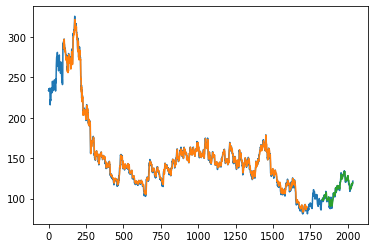

In [22]:
look_back = 100
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()